In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from moSlicer import MoSlicer
import moMetrics as mm
import moSummaryMetrics as ms
import moPlots as moPlots
import moMetricBundle as mmb
import lsst.sims.maf.plots as plots

/Users/lynnej/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
#orbitfile = 'ssm_2k/neos_2k.des'
orbitfile = 'neos_test.des'
#obsfile = 'enigma_1189_neos_2k/neos_2k_allObs.txt'
obsfile = 'neos_test_allObs.txt'
runName = 'enigma_1189'
metadata = 'NEOs_2k'
outDir = 'neo_disc'

In [3]:
mos = MoSlicer(orbitfile, Hrange=np.arange(15, 26, 0.5))
mos.readObs(obsfile)
#mos.allObs.tail(10)

In [4]:
metric = mm.DiscoveryMetric(tMin=0, tMax=90./60./24., nObsPerNight=2, 
                            nNightsPerWindow=3, tWindow=30.)
slicer = mos
pandasConstraint = None
plotDict = {'nxbins':100, 'nybins':100}
bundle = mmb.MoMetricBundle(metric, slicer, pandasConstraint, 
                            runName=runName, metadata=metadata, plotDict=plotDict)

In [5]:
bdict = {'b':bundle}
bg = mmb.MoMetricBundleGroup(bdict, outDir=outDir)
bg.runAll()

Calculated all metrics.


{'MetricVsH': 1}

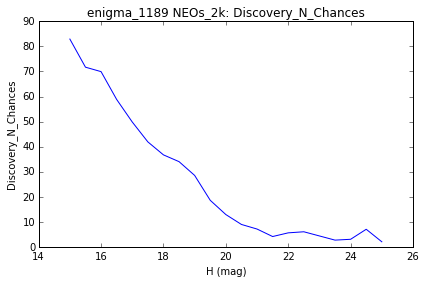

In [21]:
discChances = bundle.childBundles['N_Chances']
discChances.setPlotDict({'npReduce':np.mean})
discChances.plot(plotFunc = moPlots.MetricVsH())

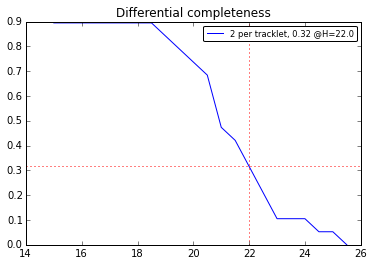

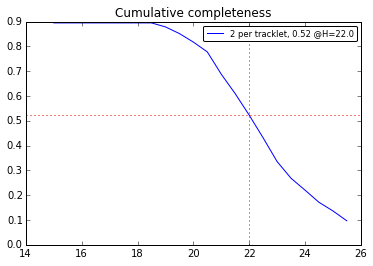

In [28]:
discChances.setSummaryMetrics([ms.CompletenessMetric(), ms.CumulativeCompletenessMetric()])
discChances.computeSummaryStats()
completeness = discChances.summaryValues['Completeness'][0]
hVals = discChances.summaryValues['Completeness'][1]
completenessInt = discChances.summaryValues['CumulativeCompleteness'][0]

Hmark = 22
Hidx = np.where(hVals == Hmark)[0]

plt.figure()
cval = completeness[Hidx]
plt.plot(hVals, completeness, label='%s per tracklet, %.2f @H=%.1f' %(2, cval, Hmark))
plt.legend(loc='upper right', fancybox=True, numpoints=1, fontsize='smaller')
plt.axvline(Hmark, color='r', linestyle=':')
plt.axhline(cval, color='r', linestyle=':')
plt.title('Differential completeness')

plt.figure()
cval = completenessInt[Hidx]
plt.plot(hVals, completenessInt, label='%s per tracklet, %.2f @H=%.1f' %(2, cval, Hmark))
plt.legend(loc='upper right', fancybox=True, numpoints=1, fontsize='smaller')
plt.axvline(Hmark, color='r', linestyle=':')
plt.axhline(cval, color='r', linestyle=':')
plt.title('Cumulative completeness')

In [7]:
hidx = np.where(mos.Hrange == 22)[0]
mval = np.swapaxes(bundle.metricValues, 0, 1)[hidx]
discoveries = mval[0].compressed()
print np.shape(discoveries)

(7,)


In [8]:
times = []
ra = []
dec = []
for i in discoveries:
    if i[0] > 0:
        times.append(i[0])
        ra.append(i[1])
        dec.append(i[2])
times = np.array(times)
ra = np.array(ra)
dec = np.array(dec)

KeyError: 0

In [ ]:
plt.plot(ra, dec, 'k.')

In [ ]:
n, b, p = plt.hist(times, bins=200, cumulative=True, edgecolor='b', facecolor='b', label='All')
condition = (dec < 0)
n, b, p = plt.hist(times[condition], bins=b, cumulative=True, edgecolor='g', facecolor='g', label='WFD')
condition = (dec > 0)
n, b, p = plt.hist(times[condition], bins=b, cumulative=True, edgecolor='r', facecolor='r', label='NES')
plt.legend(fancybox=True, numpoints=1, fontsize='smaller')
plt.xlabel('Time of first discovery')
plt.ylabel('Number of discoveries')